# Pattern Recognition Assignment 2
Lioupis Theodoros 9733
Stavrianidou Evgenia 9686

## Import Libraries

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import sympy as sym
import math

## Part A

### Question 1

The estimations of θ1 are: [0.0564138790948398, 0.773097881995519, 2.59979452369116]
The estimations of θ2 are: [-3.16145642222340]
For θ1 we keep the value 2.59979452369116
For θ2 we keep the value -3.16145642222340
Comments:
Figure 1: We see that the ln(p(D1|θ)) has two local maximums and one local minimum. We have maximum likelihood for Θ1 = 2.600 as shown in the figure.
Figure 2: We see that the ln(p(D2|θ)) has one local maximum for Θ2 = -3.161 where we also have the maximum likelihood.


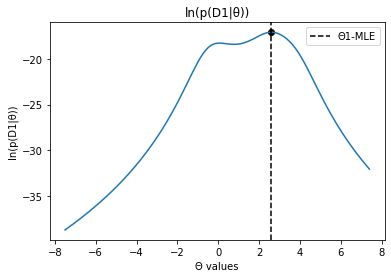

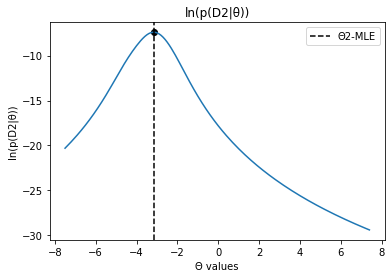

In [2]:
#symbolic variable thita
thita = sym.Symbol('thita')

#defining p(x|θ) as a function with θ as a symbolic variable
def pdf_x_thita(x):
  return (1/np.pi)/(1+(x-thita)**2)

#defining p(D|θ) using the p(x|θ) function that we made
def pdf_D_thita(D):
  n = len(D)
  product = pdf_x_thita(D[0]) #calculating P(Xn|θ) for n = 1
  for i in range(1,n):
    product = product * pdf_x_thita(D[i]) #calculating the product 
  return product #the function returns the product of P(Xn|θ) for n = [1, length of D]

#a function to calculate the dL(θ)/dΘ where L(θ) = ln(p(D|θ))
def dl_dthita(pdf):
  l_pdf = sym.log(pdf) #calculating the Ln of the given pdf
  return sym.diff(l_pdf,thita) #we return the d(l_pdf)/dΘ

#our sample X consists of D1(no stress) and D2(stress) samples
D1 = [2.8,-0.4,-0.8,2.3,-0.3,3.6,4.1]
D2 = [-4.5,-3.4,-3.1,-3.0,-2.3]

#calculating p(D|θ) for D1 and D2
pdf_D_thita_D1 = pdf_D_thita(D1)
pdf_D_thita_D2 = pdf_D_thita(D2)

#calculating dL(θ)/dΘ for D1 and D2 where L(θ) = ln(p(D|θ))
dl_dthita_D1 = dl_dthita(pdf_D_thita_D1)
dl_dthita_D2 = dl_dthita(pdf_D_thita_D2)

#calculating all possible thitas for dL(θ)/dΘ = 0 -> MLE
thita1 = sym.solveset(dl_dthita_D1,thita)
thita2 = sym.solveset(dl_dthita_D2,thita)
#keep only the real solutions (not the complex)
thita1 = [n for n in thita1.args if n.is_real]
thita2 = [n for n in thita2.args if n.is_real]
print('The estimations of θ1 are:',thita1)
print('The estimations of θ2 are:',thita2)

#calculating likelihood for thita1 estimations
ln_pdf_D_thita_D1 = sym.log(pdf_D_thita_D1) #ln(p(D1|θ))
res_ln_pdf_D_thita_D1 = []
for i in range(0,len(thita1)):
  res_ln_pdf_D_thita_D1.append(ln_pdf_D_thita_D1.subs(thita,thita1[i])) #likelihood for each thita1 estimation
#calculating likelihood for thita2 estimations
ln_pdf_D_thita_D2 = sym.log(pdf_D_thita_D2) #ln(p(D1|θ))
res_ln_pdf_D_thita_D2 = []
for i in range(0,len(thita2)):
  res_ln_pdf_D_thita_D2.append(ln_pdf_D_thita_D2.subs(thita,thita2[i])) #likelihood for each thita2 estimation

#keeping the thita where I have the maximum likelihood
thita1_max_index = res_ln_pdf_D_thita_D1.index(max(res_ln_pdf_D_thita_D1))
thita2_max_index = res_ln_pdf_D_thita_D2.index(max(res_ln_pdf_D_thita_D2))
thita1 = thita1[thita1_max_index]
thita2 = thita2[thita2_max_index]
print('For θ1 we keep the value',thita1)
print('For θ2 we keep the value',thita2)

#comments on the 2 plots
print('Comments:\nFigure 1: We see that the ln(p(D1|θ)) has two local maximums and one local minimum. We have maximum likelihood for Θ1 =',round(thita1,3),'as shown in the figure.')
print('Figure 2: We see that the ln(p(D2|θ)) has one local maximum for Θ2 =',round(thita2,3),'where we also have the maximum likelihood.')

#creating thita values
start = -7.5
stop = 7.5
step = 0.1
thita_values = np.arange(start,stop,step)
#plotting ln(p(D1|θ))
ln_pdf_D_thita_D1 = sym.log(pdf_D_thita_D1) #ln(p(D1|θ))
res_ln_pdf_D_thita_D1 = []
for i in range(0,len(thita_values)):
  res_ln_pdf_D_thita_D1.append(ln_pdf_D_thita_D1.subs(thita,thita_values[i]))
plt.figure(1)
plt.title('ln(p(D1|θ))')
plt.plot(thita_values,res_ln_pdf_D_thita_D1)
plt.axvline(x = thita1,linestyle = '--',label = 'Θ1-MLE',color='black')
plt.scatter(thita1, max(res_ln_pdf_D_thita_D1),color='black')
plt.legend()
plt.xlabel('Θ values')
plt.ylabel('ln(p(D1|θ))')
plt.show()
#plotting ln(p(D2|θ))
ln_pdf_D_thita_D2 = sym.log(pdf_D_thita_D2) #ln(p(D2|θ))
res_ln_pdf_D_thita_D2 = []
for i in range(0,len(thita_values)):
  res_ln_pdf_D_thita_D2.append(ln_pdf_D_thita_D2.subs(thita,thita_values[i]))
plt.figure(2)
plt.title('ln(p(D2|θ))')
plt.plot(thita_values,res_ln_pdf_D_thita_D2)
plt.axvline(x = thita2,linestyle = '--',label = 'Θ2-MLE',color='black')
plt.scatter(thita2, max(res_ln_pdf_D_thita_D2),color='black')
plt.legend()
plt.xlabel('Θ values')
plt.ylabel('ln(p(D2|θ))')
plt.show()

###Question 2

Value of g(x) for D1 elements: [3.8955516184169454, 0.18874977808193938, -0.3104345708927525, 3.678814965826846, 0.312716912117343, 3.487233974592281, 3.1415758031458063]
Value of g(x) for D2 elements: [-2.5766533751838767, -3.219036064033761, -3.1709349275545677, -3.114645544544944, -2.327627595928173]
We observe that g(x) is positive for D1 elements, except one, and  negative for every D2 element.
According to the figure below and the observation about the sign of g(x), we choose as a decision rule that every X value above g(x) = 0 belongs to class w1 (no stress)
and every value below g(x) = 0 belongs to class w2 (stress).
NOTE: Using this decision rule, one element of w1 (no stress) is misclassified as a w2 (stress) element because g(x) is negative at this point (but close to zero).


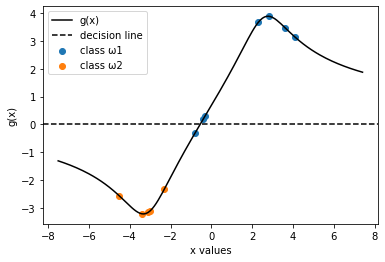

In [3]:
#a function to calculate the value of g(x) for some x_values and for specific θ1,θ2
def gx(x_values,thita1,thita2):
  p_w1 = 7/12 #apriori probability P(w1), 7 out of 12 said they didn't feel any stress
  p_w2 = 5/12 #apriori probability P(w2), 5 out of 12 said they felt stress
  pdf_x_thita1 = [] #a list to store P(x|θ1) values
  pdf_x_thita2 = [] #a list to store P(x|θ2) values
  gx = []
  for i in range(0,len(x_values)):
    pdf_x_thita1.append(pdf_x_thita(x_values[i]).subs(thita,thita1)) #calculating P(x|θ1) using our pdf_x_thita function for x_values and thita1
    pdf_x_thita2.append(pdf_x_thita(x_values[i]).subs(thita,thita2)) #calculating P(x|θ2) using our pdf_x_thita function for x_values and thita2
    gx.append(math.log(pdf_x_thita1[i]) - math.log(pdf_x_thita2[i]) + math.log(7/12) - math.log(5/12)) # g(x) = log(P(x|θ1)) - log(P(x|θ2)) + log(P(w1)) - log(P(w2))
  return gx
  
#creating some x_values
start = -7.5
stop = 7.5
step = 0.1
x_values = np.arange(start,stop,step)
#calculating g(x)
gx_total = gx(x_values,thita1,thita2) #g(x) for x_values to plot the whole function g(x)
gx_D1 = gx(D1,thita1,thita2) #g(x) for D1
gx_D2 = gx(D2,thita1,thita2) #g(x) for D2
#print g(x) values
print('Value of g(x) for D1 elements:',gx_D1)
print('Value of g(x) for D2 elements:',gx_D2)
print('We observe that g(x) is positive for D1 elements, except one, and  negative for every D2 element.')
print('According to the figure below and the observation about the sign of g(x), we choose as a decision rule that every X value above g(x) = 0 belongs to class w1 (no stress)')
print('and every value below g(x) = 0 belongs to class w2 (stress).')
print('NOTE: Using this decision rule, one element of w1 (no stress) is misclassified as a w2 (stress) element because g(x) is negative at this point (but close to zero).')
#plotting g(x)
plt.figure(3)
plt.plot(x_values,gx_total,label = 'g(x)',color = 'black')
plt.scatter(D1,gx_D1,marker = 'o',label = 'class ω1')
plt.scatter(D2,gx_D2,marker = 'o',label = 'class ω2')
plt.axhline(y = 0,linestyle = '--',label = 'decision line',color='black')
plt.legend()
plt.xlabel('x values')
plt.ylabel('g(x)')
plt.show()

##Part B

###Question 1

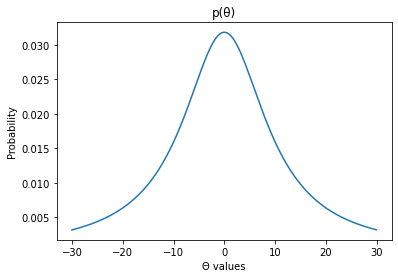



We observe that p(θ|D1) and p(θ|D2) is taller and more narrow than p(θ).
The two pdfs are different because p(θ|D) depends on our data D1 or D2.




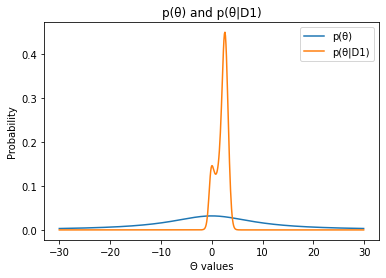

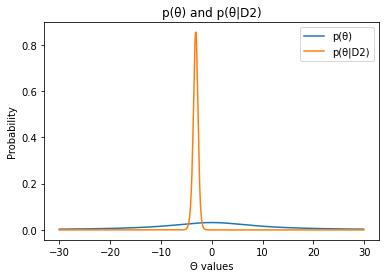

In [4]:
#function to calculate p(θ) for given thita 
def pdf_thita(thita):
  return 1/(10*np.pi)/(1+(thita/10)**2)
#creating some thita values to plot p(θ)
start = -30
stop = 30
step = 0.1
thita_values = np.arange(start,stop,step)
#plotting p(θ)
plt.figure(4)
plt.title('p(θ)')
plt.plot(thita_values,pdf_thita(thita_values))
plt.xlabel('Θ values')
plt.ylabel('Probability')
plt.show()

#function to calculate p(θ|D) for given p(D|θ), p(θ), and the integration interval [a,b]
def pdf_thita_D(pdf_D_thita,pdf_thita,a,b):
  #we calculate the integral: Σ(p(D|θ)*p(θ)dθ) (ΚΑΝΟΝΑΣ ΤΡΑΠΕΖΙΟΥ)
  fx = pdf_D_thita*pdf_thita #we calculate the p(D|θ)*p(θ)
  n = 1000 
  h = (b-a)/n                                      
  x0 = a
  xn = b
  fi = []
  for i in range(0,n+1):
    xi = x0 + i*h
    fi.append(fx.subs(thita,xi))
  I = (h/2)*(fi[0] + 2*(sum(fi)-fi[0]-fi[n]) + fi[n]) #I = h/2(f0+2·f1+...+2·fn−1+fn) = h/2(f0+2·∑fi+fn)
  return fx/I #we return p(D|θ)*p(θ)/(Σ(p(D|θ)*p(θ)dθ))

#calculating p(θ|D) for D1,D2
pdf_thita_D_D1 = pdf_thita_D(pdf_D_thita_D1,pdf_thita(thita),start,stop) #we chose as the integration interval [a,b] the values (start,stop) = (-30,30) after observing 
                                                                         #the plot of p(θ) and we decided that this interval is enough for the integration of Σ(p(D|θ)*p(θ)dθ)
pdf_thita_D_D2 = pdf_thita_D(pdf_D_thita_D2,pdf_thita(thita),start,stop) 

print('\n\nWe observe that p(θ|D1) and p(θ|D2) is taller and more narrow than p(θ).')
print('The two pdfs are different because p(θ|D) depends on our data D1 or D2.\n\n')

#plotting p(θ) and p(θ|D1)
plt.figure(5)
plt.title('p(θ) and p(θ|D1)')
plt.plot(thita_values,pdf_thita(thita_values),label='p(θ)')
res_pdf_thita_D_D1 = []
for i in range(0,len(thita_values)):  #calculating p(θ|D1) for thita_values
  res_pdf_thita_D_D1.append(pdf_thita_D_D1.subs(thita,thita_values[i]))
plt.plot(thita_values,res_pdf_thita_D_D1,label='p(θ|D1)')
plt.xlabel('Θ values')
plt.ylabel('Probability')
plt.legend()
plt.show()

#plotting p(θ) and p(θ|D2)
plt.figure(5)
plt.title('p(θ) and p(θ|D2)')
plt.plot(thita_values,pdf_thita(thita_values),label='p(θ)')
res_pdf_thita_D_D2 = []
for i in range(0,len(thita_values)):  #calculating p(θ|D2) for thita_values
  res_pdf_thita_D_D2.append(pdf_thita_D_D2.subs(thita,thita_values[i]))
plt.plot(thita_values,res_pdf_thita_D_D2,label='p(θ|D2)')
plt.xlabel('Θ values')
plt.ylabel('Probability')
plt.legend()
plt.show()


###Question 2

Value of h(x) for D1 elements: [3.4089000855185088, 1.0625699141071494, 0.5255118298972001, 3.2743152591030578, 1.1832927430155116, 3.267459514028355, 3.0215435451698913]
Value of h(x) for D2 elements: [-2.39025480283589, -2.6739121341825154, -2.5688410349514843, -2.510288584593596, -1.786588653085765]


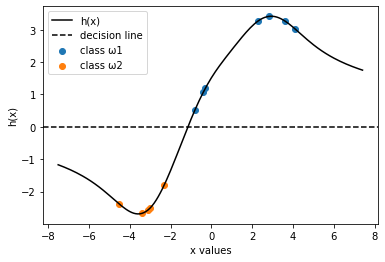



We observe that in this case the decision rule is more clear since h(x) is positive for every D1 element and negative for every D2. So, there is a 100% accuracy (no point misclassified).
Thus, the Bayes method for parameter calculation is better here than the Maximum likelihood method.




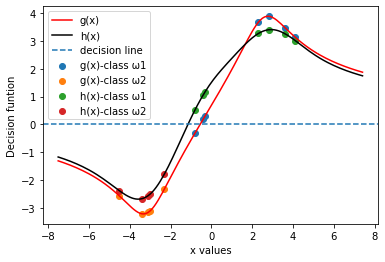

In [5]:
#a function to calculate the p(x|D) = Σ(p(x|θ,D)*p(θ|D)d(θ)) for given p(x|θ,D),p(θ|D) and the integration interval [a,b]
def pdf_x_D(pdf_x_thita,pdf_thita_D,a,b):
  #we calculate the integral: Σ(p(x|θ,D)*p(θ|D)d(θ)) (ΚΑΝΟΝΑΣ ΤΡΑΠΕΖΙΟΥ)
  fx = pdf_x_thita*pdf_thita_D #p(x|θ,D)*p(θ|D)
  n = 100
  h = (b-a)/n         
  x0 = a
  xn = b
  fi = []
  for i in range(0,n+1):
    xi = x0 + i*h
    fi.append(fx.subs(thita,xi))
  I = (h/2)*(fi[0] + 2*(sum(fi)-fi[0]-fi[n]) + fi[n]) #I = h/2(f0+2·f1+...+2·fn−1+fn) = h/2(f0+2·∑fi+fn)
  return I

#a function to calculate the value of h(x) for some x_values
def hx(x_values,pdf_thita_D_D1,pdf_thita_D_D2,a,b):
  p_w1 = 7/12 #apriori probability P(w1), 7 out of 12 said they didn't feel any stress
  p_w2 = 5/12 #apriori probability P(w2), 5 out of 12 said they felt stress
  x = sym.Symbol('x')
  pdf_x_D1 = pdf_x_D(pdf_x_thita(x),pdf_thita_D_D1,a,b) #we use the function pdf_x_D(...) to calculate p(x|D1)
  pdf_x_D2 = pdf_x_D(pdf_x_thita(x),pdf_thita_D_D2,a,b) #we use the function pdf_x_D(...) to calculate p(x|D2)
  hx = []
  for i in range(0,len(x_values)):
    hx.append(math.log(pdf_x_D1.subs(x,x_values[i]))-math.log(pdf_x_D2.subs(x,x_values[i]))+math.log(7/12)-math.log(5/12)) # h(x) = log(P(x|D1)) - log(P(x|D2)) + log(P(w1)) - log(P(w2))
  return hx

#calculating h(x)
#we chose as the integration interval [a,b] the values (start,stop) = (-30,30) after observing 
#the plot of p(θ) and we decided that this interval is enough for the integration of Σ(p(x|θ,D)*p(θ|D)d(θ))
hx_total = hx(x_values,pdf_thita_D_D1,pdf_thita_D_D2,start,stop) #h(x) for x_values to plot the whole function h(x)
hx_D1 = hx(D1,pdf_thita_D_D1,pdf_thita_D_D2,start,stop) #h(x) for D1  (pdf_thita_D_D1,pdf_thita_D_D2 calculated in Question B1)
hx_D2 = hx(D2,pdf_thita_D_D1,pdf_thita_D_D2,start,stop) #h(x) for D2

#print h(x) values
print('Value of h(x) for D1 elements:',hx_D1)
print('Value of h(x) for D2 elements:',hx_D2)

#plotting h(x)
plt.figure(6)
plt.plot(x_values,hx_total,label = 'h(x)',color = 'black')
plt.scatter(D1,hx_D1,marker = 'o',label = 'class ω1')
plt.scatter(D2,hx_D2,marker = 'o',label = 'class ω2')
plt.axhline(y = 0,linestyle = '--',label = 'decision line',color='black')
plt.legend()
plt.xlabel('x values')
plt.ylabel('h(x)')
plt.show()

print('\n\nWe observe that in this case the decision rule is more clear since h(x) is positive for every D1 element and negative for every D2. So, there is a 100% accuracy (no point misclassified).') 
print('Thus, the Bayes method for parameter calculation is better here than the Maximum likelihood method.\n\n')

#comparing g(x) and h(x)
plt.figure(7)
plt.plot(x_values,gx_total,label = 'g(x)',color = 'red')
plt.plot(x_values,hx_total,label = 'h(x)',color = 'black')
plt.scatter(D1,gx_D1,marker = 'o',label = 'g(x)-class ω1')
plt.scatter(D2,gx_D2,marker = 'o',label = 'g(x)-class ω2')
plt.scatter(D1,hx_D1,marker = 'o',label = 'h(x)-class ω1')
plt.scatter(D2,hx_D2,marker = 'o',label = 'h(x)-class ω2')
plt.axhline(y = 0,linestyle = '--',label = 'decision line')
plt.legend()
plt.xlabel('x values')
plt.ylabel('Decision funtion')
plt.show()






####Our thoughts on why Bayesian Estimation gives better decision results than Maximum Likelihood Estimation

Main differences on the two methods:

*   MLE calculates a specific value for our parameter θ, while Bayes is using the pdf of the parameter θ (p(θ)).
*   MLE returns a single fixed value, but Bayes returns probability density function. 
*   On MLE we just use p(x|θ1,2). On Bayes, based on D and apriori p(θ) we calculate the p(x|D).
*   Since Bayes is based on p(θ), which we know is reliable, we expect to have better results.
*   Finally, MLE depends solely on the outcomes of observed data while Bayesian estimation’s incorporation of prior knowledge gives a more accurate model.
